In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [3]:
from evolving_comm_network import *

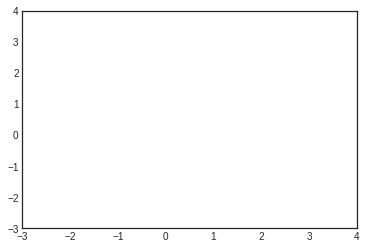

In [4]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-3, 4), ylim=(-3, 4))
particles_d, = ax.plot([], [], 'bo', ms=2)
particles_c, = ax.plot([], [], 'ro', ms=2)
#parents, = ax.plot([], [], 'ro', ms=4)

# initialization function: plot the background of each frame
def init():
    particles_c.set_data([], [])
    particles_d.set_data([], [])
    #parents.set_data([], [])
    return particles_c,particles_d

# animation function.  This is called sequentially
def animate(i):
    global locs,loc_c,loc_d
    x_c = [z[0] for z in loc_c[i]]
    y_c = [z[1] for z in loc_c[i]]
    particles_c.set_data(x_c,y_c)
    x_d = [z[0] for z in loc_d[i]]
    y_d = [z[1] for z in loc_d[i]]
    particles_d.set_data(x_d,y_d)
    return particles_c,particles_d

In [5]:
PD1 = Simulation_PD(500, 100, bernoulli_arms, discounted_thompson, 250, False, True, 1)

Progress: [##########] 100.0%
Duration: 0:00:17


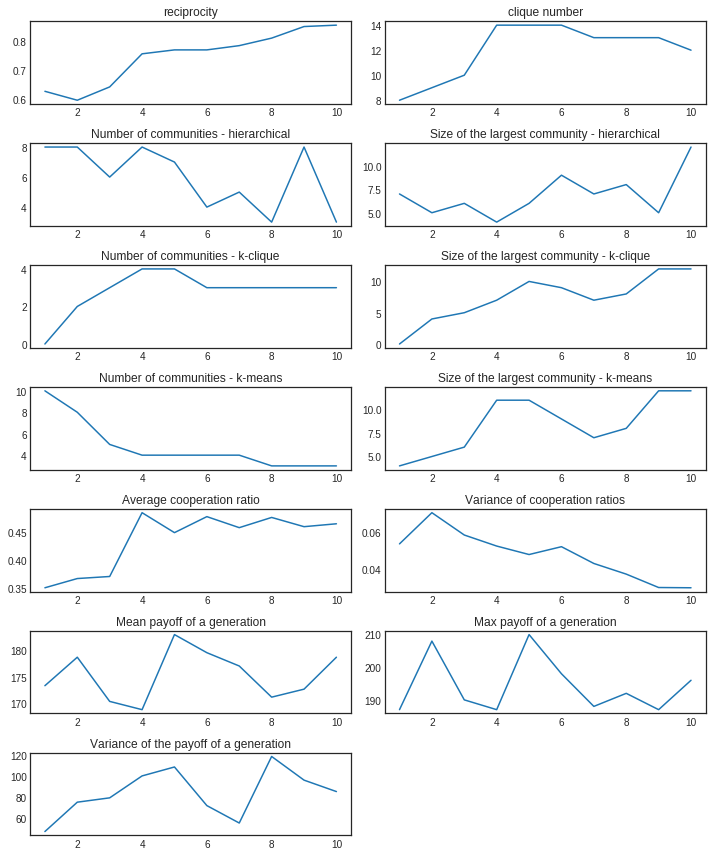

In [6]:
locs,loc_c,loc_d = PD1.plot_data_mult_gen(True, 0.01)

In [7]:
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=250, interval=100, blit=True)
rc('animation', html='html5')
anim